# Practice Project 2: Salary Predictions

In [1]:
import pandas as pd
data=pd.read_csv('salary.csv')
print('DataFrame View: ')
print('View 1: Head View: ', end='\n'*2)
print(data.head(), end='\n'*2)
print('View 2: Sample View: ', end='\n'*2)
print(data.sample(), end='\n'*2)
print('View 3: Tail View: ', end='\n'*2)
print(data.tail(), end='\n'*2)

DataFrame View: 
View 1: Head View: 

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500

View 2: Sample View: 

     rank discipline  yrs.since.phd  yrs.service   sex  salary
165  Prof          B             21            8  Male  105890

View 3: Tail View: 

         rank discipline  yrs.since.phd  yrs.service   sex  salary
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   8103

In [2]:
type(data), type(data.columns)

(pandas.core.frame.DataFrame, pandas.core.indexes.base.Index)

In [3]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [4]:
data.isna().values.any()

False

# Observations:
1. There are 397 rows and 6 columns.
2. There are 3 categorical columns and 3 continuous columns.
3. Therefore, useful columns are very low. To increase information gain, I will do encoding of ordinal data and fetaure engineering in further steps.
4. There are no null or missing values, hence, imputation and missing values traeatment are not required.

# Encoding Of Catdgorical Data

In [5]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data[['rank', 'discipline','sex']])
result

array([[2., 1., 1.],
       [2., 1., 1.],
       [1., 1., 1.],
       ...,
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.]])

In [6]:
len(result)

397

In [7]:
len(data)

397

# Encoding Of Categorical Data

In [8]:
encoded_data=pd.DataFrame(data=result, columns=['rank_encoded', 'discipline_encoded', 'sex_encoded'])
encoded_data

,rank_encoded,discipline_encoded,sex_encoded
0,2.0,1.0,1.0
1,2.0,1.0,1.0
2,1.0,1.0,1.0
3,2.0,1.0,1.0
4,2.0,1.0,1.0
...,...,...,...
392,2.0,0.0,1.0
393,2.0,0.0,1.0
394,2.0,0.0,1.0
395,2.0,0.0,1.0


In [9]:
encoded_data.columns

Index(['rank_encoded', 'discipline_encoded', 'sex_encoded'], dtype='object')

In [10]:
encoded_data_weighted=encoded_data*10000
encoded_data_weighted=encoded_data_weighted.rename(columns={'rank_encoded':'rank_encoded_weighted'})
encoded_data_weighted=encoded_data_weighted.rename(columns={'discipline_encoded':'discipline_encoded_weighted', 'sex_encoded':'sex_encoded_weighted'})

In [11]:
encoded_data_weighted

,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted
0,20000.0,10000.0,10000.0
1,20000.0,10000.0,10000.0
2,10000.0,10000.0,10000.0
3,20000.0,10000.0,10000.0
4,20000.0,10000.0,10000.0
...,...,...,...
392,20000.0,0.0,10000.0
393,20000.0,0.0,10000.0
394,20000.0,0.0,10000.0
395,20000.0,0.0,10000.0


In [12]:
new_data1=pd.concat([data, encoded_data], axis=1, ignore_index=False)
new_data1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,rank_encoded,discipline_encoded,sex_encoded
0,Prof,B,19,18,Male,139750,2.0,1.0,1.0
1,Prof,B,20,16,Male,173200,2.0,1.0,1.0
2,AsstProf,B,4,3,Male,79750,1.0,1.0,1.0
3,Prof,B,45,39,Male,115000,2.0,1.0,1.0
4,Prof,B,40,41,Male,141500,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106,2.0,0.0,1.0
393,Prof,A,31,19,Male,150564,2.0,0.0,1.0
394,Prof,A,42,25,Male,101738,2.0,0.0,1.0
395,Prof,A,25,15,Male,95329,2.0,0.0,1.0


In [13]:
new_data=pd.concat([new_data1, encoded_data_weighted], axis=1, ignore_index=False)
new_data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted
0,Prof,B,19,18,Male,139750,2.0,1.0,1.0,20000.0,10000.0,10000.0
1,Prof,B,20,16,Male,173200,2.0,1.0,1.0,20000.0,10000.0,10000.0
2,AsstProf,B,4,3,Male,79750,1.0,1.0,1.0,10000.0,10000.0,10000.0
3,Prof,B,45,39,Male,115000,2.0,1.0,1.0,20000.0,10000.0,10000.0
4,Prof,B,40,41,Male,141500,2.0,1.0,1.0,20000.0,10000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106,2.0,0.0,1.0,20000.0,0.0,10000.0
393,Prof,A,31,19,Male,150564,2.0,0.0,1.0,20000.0,0.0,10000.0
394,Prof,A,42,25,Male,101738,2.0,0.0,1.0,20000.0,0.0,10000.0
395,Prof,A,25,15,Male,95329,2.0,0.0,1.0,20000.0,0.0,10000.0


In [14]:
data=new_data.drop(['rank', 'discipline', 'sex'], axis=1)
data

,yrs.since.phd,yrs.service,salary,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted
0,19,18,139750,2.0,1.0,1.0,20000.0,10000.0,10000.0
1,20,16,173200,2.0,1.0,1.0,20000.0,10000.0,10000.0
2,4,3,79750,1.0,1.0,1.0,10000.0,10000.0,10000.0
3,45,39,115000,2.0,1.0,1.0,20000.0,10000.0,10000.0
4,40,41,141500,2.0,1.0,1.0,20000.0,10000.0,10000.0
...,...,...,...,...,...,...,...,...,...
392,33,30,103106,2.0,0.0,1.0,20000.0,0.0,10000.0
393,31,19,150564,2.0,0.0,1.0,20000.0,0.0,10000.0
394,42,25,101738,2.0,0.0,1.0,20000.0,0.0,10000.0
395,25,15,95329,2.0,0.0,1.0,20000.0,0.0,10000.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yrs.since.phd                397 non-null    int64  
 1   yrs.service                  397 non-null    int64  
 2   salary                       397 non-null    int64  
 3   rank_encoded                 397 non-null    float64
 4   discipline_encoded           397 non-null    float64
 5   sex_encoded                  397 non-null    float64
 6   rank_encoded_weighted        397 non-null    float64
 7   discipline_encoded_weighted  397 non-null    float64
 8   sex_encoded_weighted         397 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.0 KB


In [16]:
data.isna().any()

yrs.since.phd                  False
yrs.service                    False
salary                         False
rank_encoded                   False
discipline_encoded             False
sex_encoded                    False
rank_encoded_weighted          False
discipline_encoded_weighted    False
sex_encoded_weighted           False
dtype: bool

In [17]:
data.isnull().sum()

yrs.since.phd                  0
yrs.service                    0
salary                         0
rank_encoded                   0
discipline_encoded             0
sex_encoded                    0
rank_encoded_weighted          0
discipline_encoded_weighted    0
sex_encoded_weighted           0
dtype: int64

In [18]:
data['Overall Experience']=data['yrs.since.phd']+data['yrs.service']
data

,yrs.since.phd,yrs.service,salary,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
0,19,18,139750,2.0,1.0,1.0,20000.0,10000.0,10000.0,37
1,20,16,173200,2.0,1.0,1.0,20000.0,10000.0,10000.0,36
2,4,3,79750,1.0,1.0,1.0,10000.0,10000.0,10000.0,7
3,45,39,115000,2.0,1.0,1.0,20000.0,10000.0,10000.0,84
4,40,41,141500,2.0,1.0,1.0,20000.0,10000.0,10000.0,81
...,...,...,...,...,...,...,...,...,...,...
392,33,30,103106,2.0,0.0,1.0,20000.0,0.0,10000.0,63
393,31,19,150564,2.0,0.0,1.0,20000.0,0.0,10000.0,50
394,42,25,101738,2.0,0.0,1.0,20000.0,0.0,10000.0,67
395,25,15,95329,2.0,0.0,1.0,20000.0,0.0,10000.0,40


In [19]:
data.columns

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_encoded',
       'discipline_encoded', 'sex_encoded', 'rank_encoded_weighted',
       'discipline_encoded_weighted', 'sex_encoded_weighted',
       'Overall Experience'],
      dtype='object')

# EDA

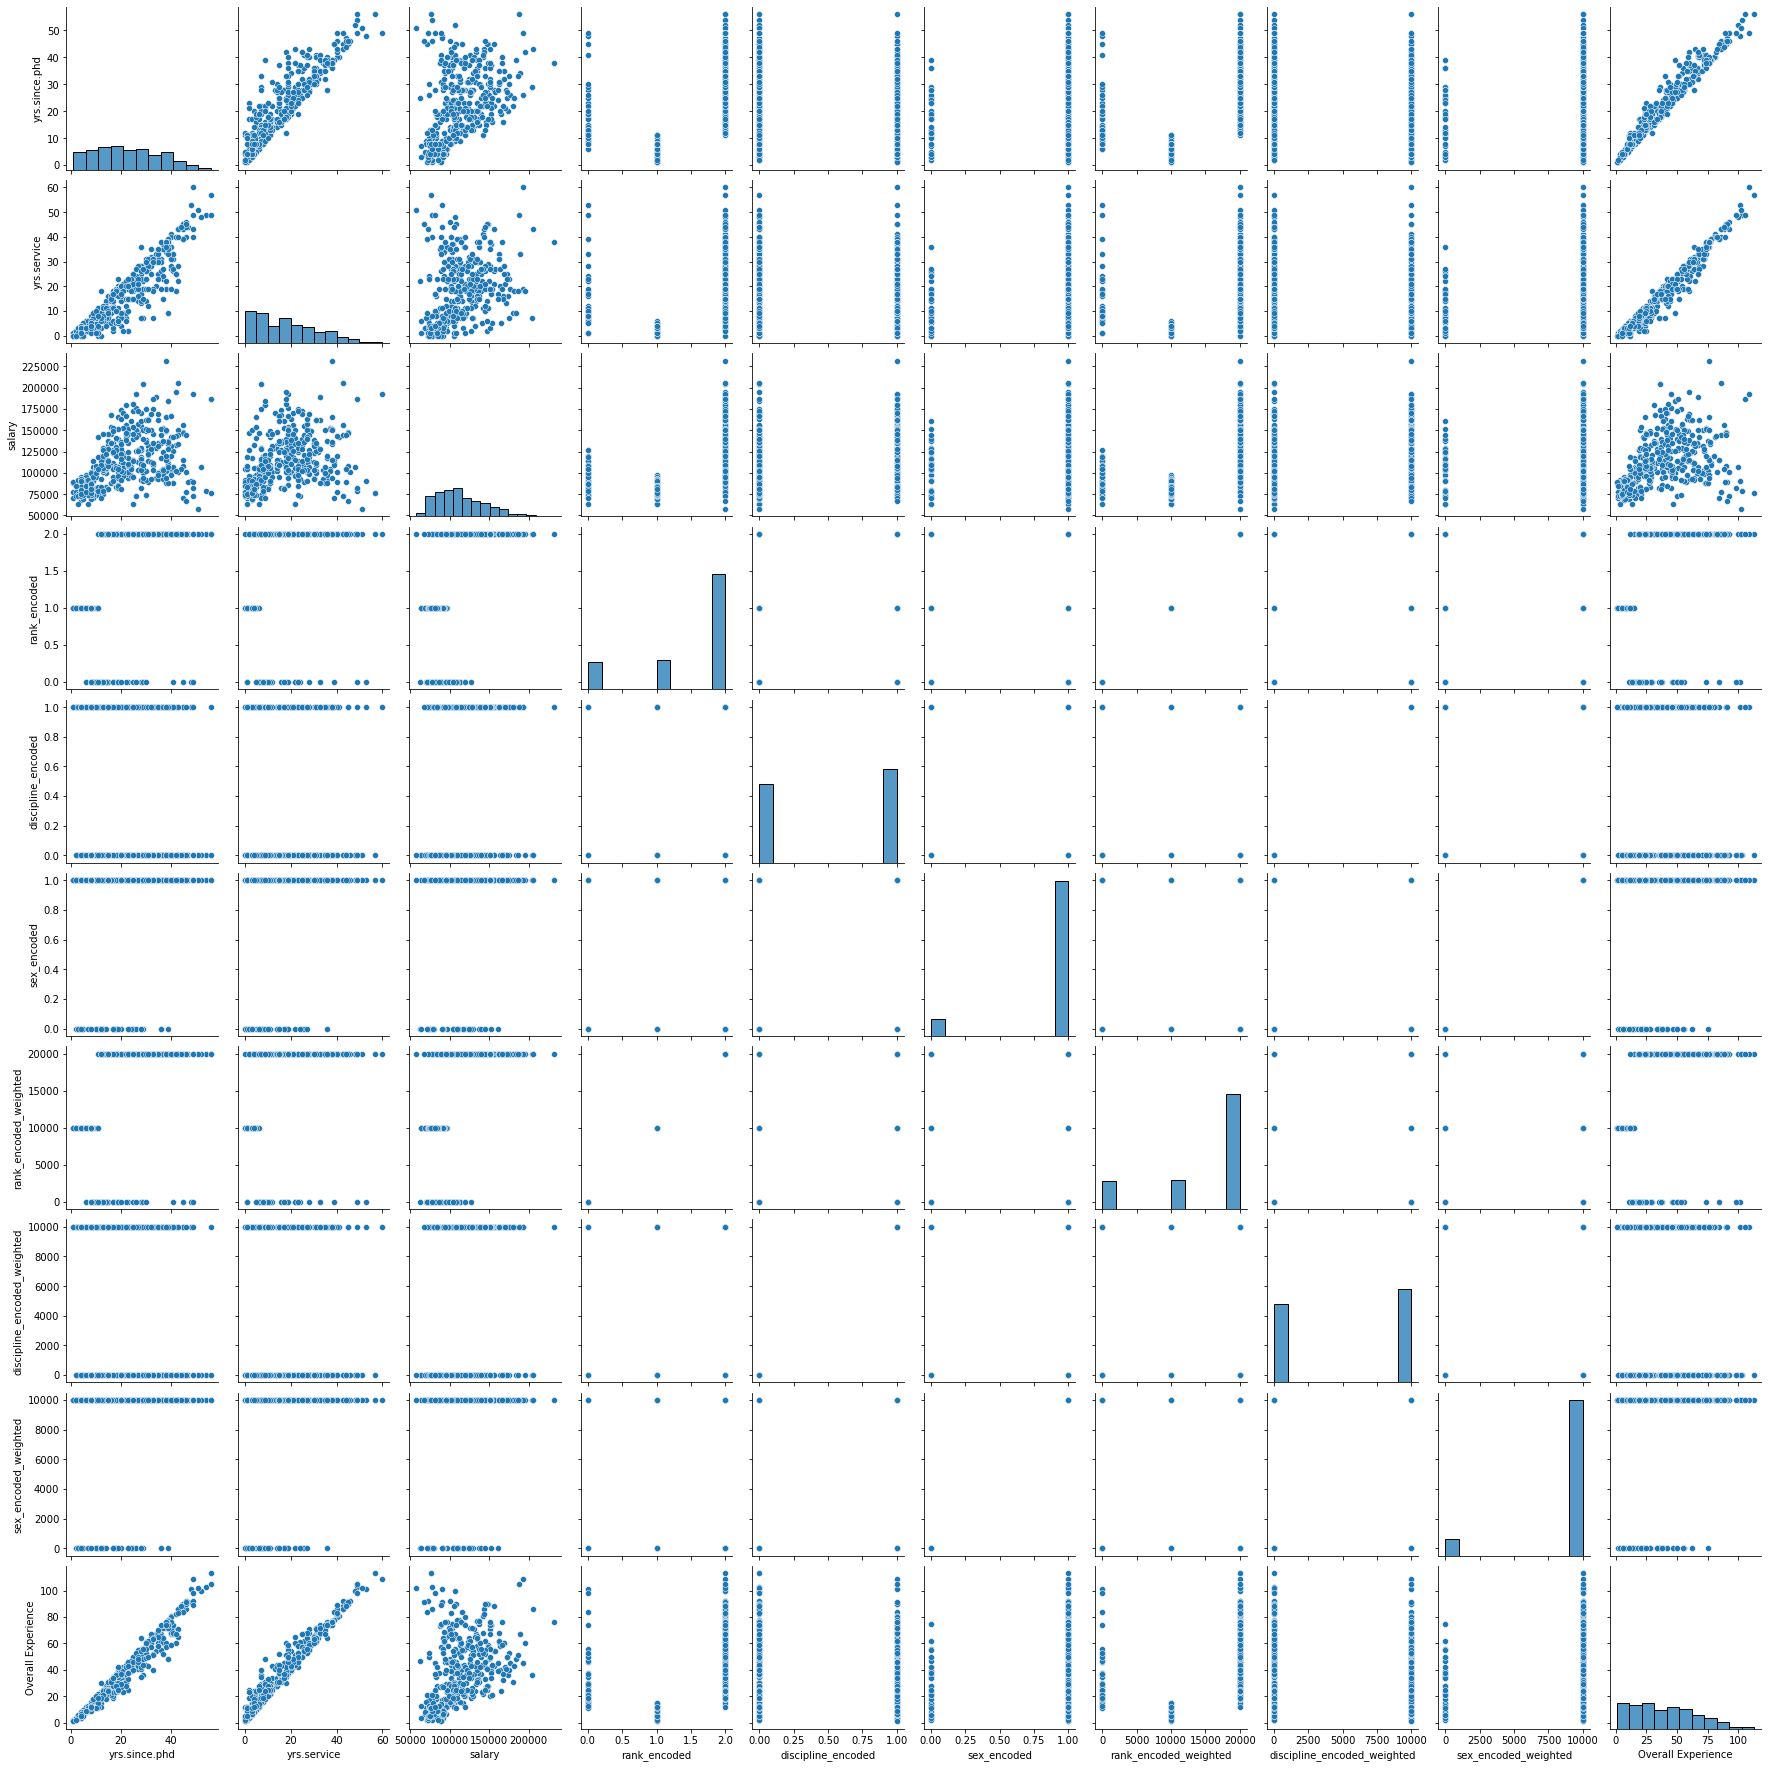

In [20]:
import seaborn as sns
sns.pairplot(data)

In [21]:
data.corr()

,yrs.since.phd,yrs.service,salary,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
yrs.since.phd,1.000000,0.909649,0.419231,0.525500,-0.218087,0.148788,0.525500,-0.218087,0.148788,0.976938
yrs.service,0.909649,1.000000,0.334745,0.447499,-0.164599,0.153740,0.447499,-0.164599,0.153740,0.977363
salary,0.419231,0.334745,1.000000,0.522207,0.156084,0.138610,0.522207,0.156084,0.138610,0.385604
rank_encoded,0.525500,0.447499,0.522207,1.000000,-0.086266,0.132492,1.000000,-0.086266,0.132492,0.497692
discipline_encoded,-0.218087,-0.164599,0.156084,-0.086266,1.000000,0.003724,-0.086266,1.000000,0.003724,-0.195691
sex_encoded,0.148788,0.153740,0.138610,0.132492,0.003724,1.000000,0.132492,0.003724,1.000000,0.154812
rank_encoded_weighted,0.525500,0.447499,0.522207,1.000000,-0.086266,0.132492,1.000000,-0.086266,0.132492,0.497692
discipline_encoded_weighted,-0.218087,-0.164599,0.156084,-0.086266,1.000000,0.003724,-0.086266,1.000000,0.003724,-0.195691
sex_encoded_weighted,0.148788,0.153740,0.138610,0.132492,0.003724,1.000000,0.132492,0.003724,1.000000,0.154812
Overall Experience,0.976938,0.977363,0.385604,0.497692,-0.195691,0.154812,0.497692,-0.195691,0.154812,1.000000


In [22]:
data.corr()['salary'].sort_values()

sex_encoded                    0.138610
sex_encoded_weighted           0.138610
discipline_encoded             0.156084
discipline_encoded_weighted    0.156084
yrs.service                    0.334745
Overall Experience             0.385604
yrs.since.phd                  0.419231
rank_encoded                   0.522207
rank_encoded_weighted          0.522207
salary                         1.000000
Name: salary, dtype: float64

<AxesSubplot:>

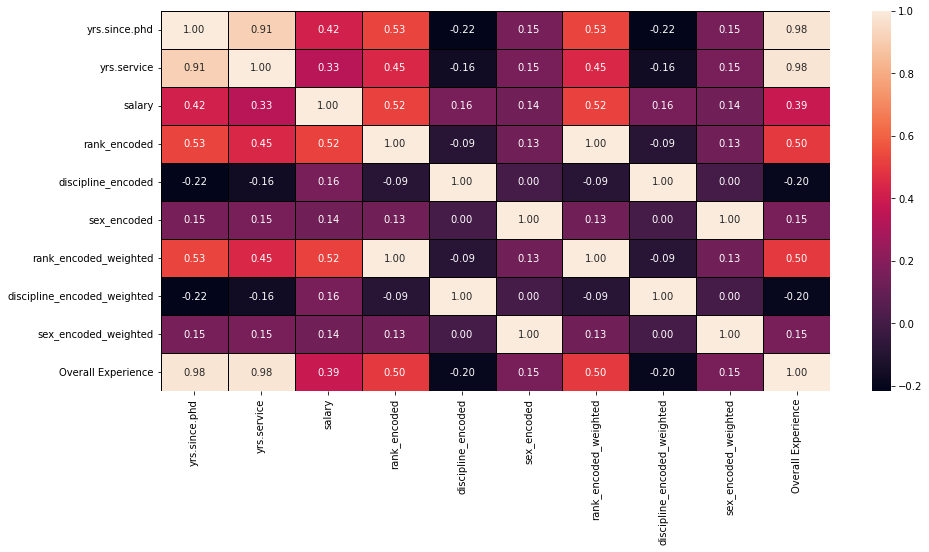

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f')

# Observations
1. Sex encoded and total rank encoded are  negatively correlated with each other.
2. Across all 371 salary, sex encodeed range from 0 to 4, rank_encoded_weighted range from 0 to 60000, rank encoded range from 0 to 6.
3. All the features have weak positive and strong positive correlation with label and rank encoded and rank endoded weight sharing strong positive relation with label.

# Descriptive Statistics

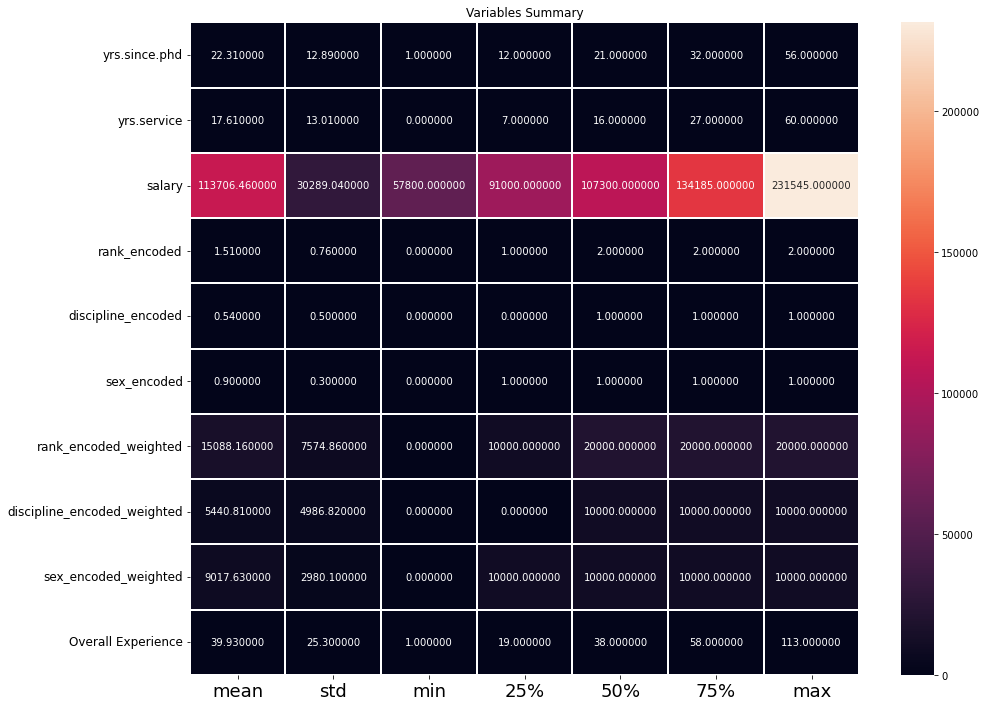

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variables Summary')
plt.savefig('heatmap.png')
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yrs.since.phd                397 non-null    int64  
 1   yrs.service                  397 non-null    int64  
 2   salary                       397 non-null    int64  
 3   rank_encoded                 397 non-null    float64
 4   discipline_encoded           397 non-null    float64
 5   sex_encoded                  397 non-null    float64
 6   rank_encoded_weighted        397 non-null    float64
 7   discipline_encoded_weighted  397 non-null    float64
 8   sex_encoded_weighted         397 non-null    float64
 9   Overall Experience           397 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 31.1 KB


# Observations:
1. There are no null values.
2. All observations lie within 100000 and 250000 with descriptive statistics annotated in the heatmap.

# Outliers Detection

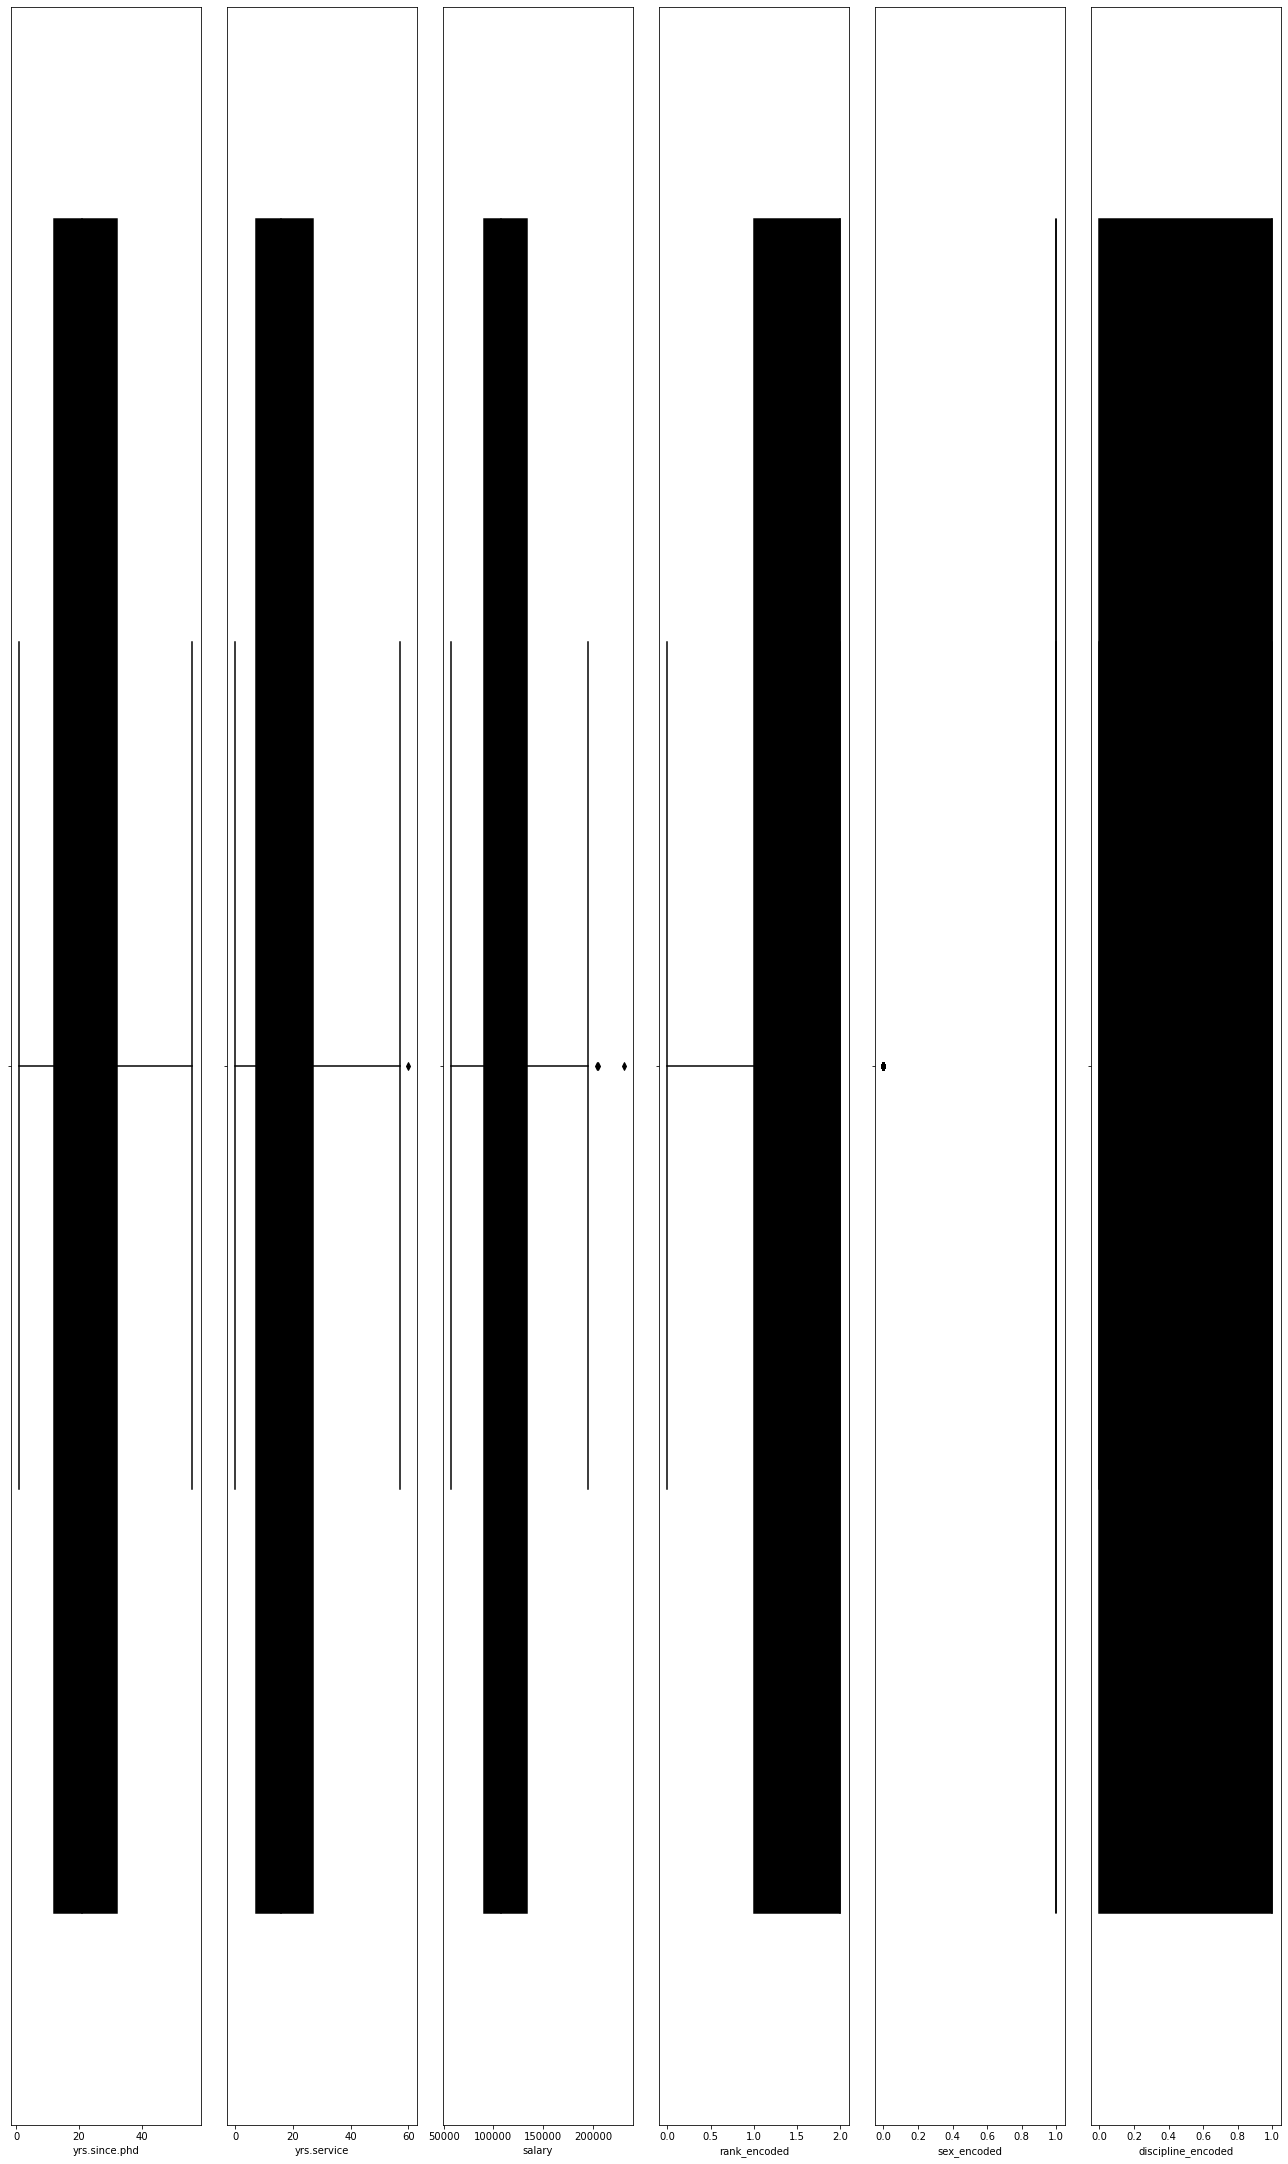

In [26]:
import warnings
warnings.filterwarnings('ignore')
colist=['yrs.since.phd','yrs.service','salary','rank_encoded','sex_encoded','discipline_encoded']
ncol=30
nrows=30
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    plt.subplot(nrows, ncol, x+1)
    sns.boxplot(data[colist[x]], color='black')
    plt.tight_layout()

# Observations:
1. Outliers seem to be minimal.
2. It is slightly present in yrs.service, salary and sex_encoded.
3. There are no outliers in other features.

# Skewness Modelling
Normal Distribution has skewness = 0, as that is practicality myth, I have applied skewness range of -0.5 to +0.5 for this model and not all the features seem to lie within this range.

In [27]:
data.skew()

yrs.since.phd                  0.300880
yrs.service                    0.650569
salary                         0.714568
rank_encoded                  -1.151164
discipline_encoded            -0.177684
sex_encoded                   -2.709958
rank_encoded_weighted         -1.151164
discipline_encoded_weighted   -0.177684
sex_encoded_weighted          -2.709958
Overall Experience             0.478076
dtype: float64

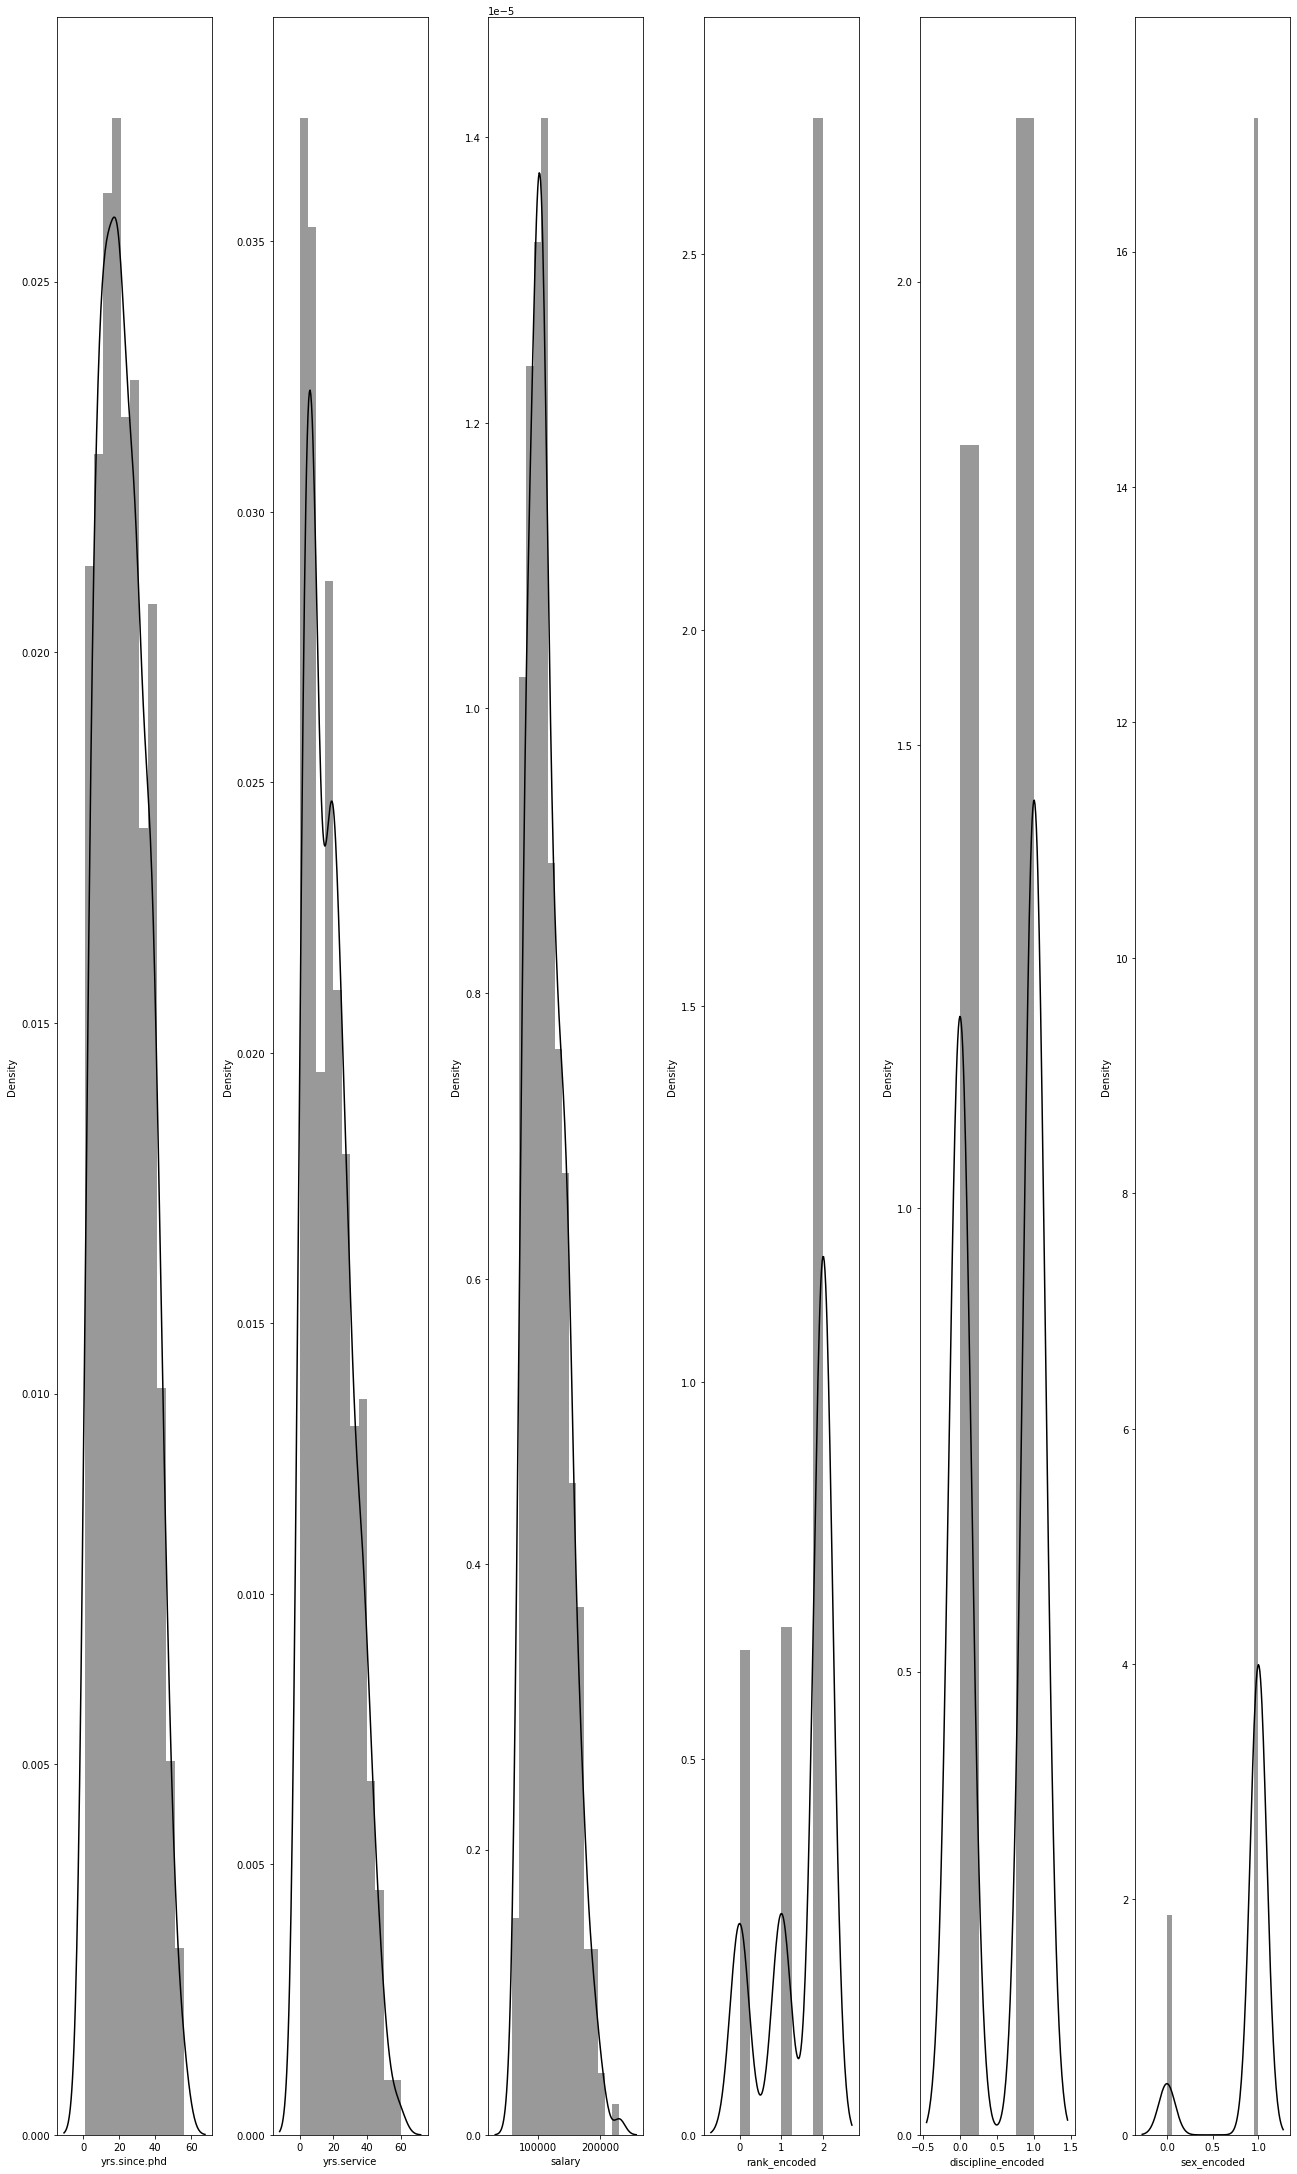

In [28]:
colist=['yrs.since.phd','yrs.service','salary','rank_encoded','discipline_encoded', 'sex_encoded']
ncol=30
nrows=30
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    plt.subplot(nrows, ncol, x+1)
    sns.distplot(data[colist[x]], color='black')
    plt.tight_layout()

# Observation:
There seems acceptable abnormality in data; with yrs. since. ph; yrs. service and salary showing right skewness and encoded columns are showing right skewnwss. Hence, there is requirement of normalization in this dataset

# Z Score : Outlier Removal

In [29]:
import numpy as np
from scipy.stats import stats
score=np.abs(stats.zscore(data))
score.shape

(397, 10)

In [30]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([  9,   9,  19,  19,  24,  24,  34,  34,  35,  35,  43,  47,  47,
        48,  48,  52,  52,  63,  63,  68,  68,  84,  84,  90,  90, 103,
       103, 114, 114, 119, 119, 123, 123, 127, 127, 131, 132, 132, 133,
       133, 148, 148, 153, 153, 179, 179, 186, 186, 218, 218, 230, 230,
       231, 231, 233, 233, 237, 237, 245, 245, 253, 253, 254, 254, 274,
       274, 316, 316, 323, 323, 330, 332, 332, 334, 334, 341, 341, 358,
       358, 361, 361, 364], dtype=int64), array([5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 2, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5,
       8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 1, 5, 8, 5, 8, 5, 8, 5, 8,
       5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8,
       5, 8, 5, 8, 1, 5, 8, 5, 8, 5, 8, 5, 8, 5, 8, 2], dtype=int64))


In [31]:
data.iloc[4]

yrs.since.phd                      40.0
yrs.service                        41.0
salary                         141500.0
rank_encoded                        2.0
discipline_encoded                  1.0
sex_encoded                         1.0
rank_encoded_weighted           20000.0
discipline_encoded_weighted     10000.0
sex_encoded_weighted            10000.0
Overall Experience                 81.0
Name: 4, dtype: float64

In [32]:
len(np.where(score>3)[0])

82

In [33]:
data_new=data[(score<3).all(axis=1)]
data_new

,yrs.since.phd,yrs.service,salary,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
0,19,18,139750,2.0,1.0,1.0,20000.0,10000.0,10000.0,37
1,20,16,173200,2.0,1.0,1.0,20000.0,10000.0,10000.0,36
2,4,3,79750,1.0,1.0,1.0,10000.0,10000.0,10000.0,7
3,45,39,115000,2.0,1.0,1.0,20000.0,10000.0,10000.0,84
4,40,41,141500,2.0,1.0,1.0,20000.0,10000.0,10000.0,81
...,...,...,...,...,...,...,...,...,...,...
392,33,30,103106,2.0,0.0,1.0,20000.0,0.0,10000.0,63
393,31,19,150564,2.0,0.0,1.0,20000.0,0.0,10000.0,50
394,42,25,101738,2.0,0.0,1.0,20000.0,0.0,10000.0,67
395,25,15,95329,2.0,0.0,1.0,20000.0,0.0,10000.0,40


# After removing outliers, I am removing all negative values from the data, to make it more acceptable to the label

In [34]:
data_new=data_new[data_new.all(axis=1)>0]
data_new

,yrs.since.phd,yrs.service,salary,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
0,19,18,139750,2.0,1.0,1.0,20000.0,10000.0,10000.0,37
1,20,16,173200,2.0,1.0,1.0,20000.0,10000.0,10000.0,36
2,4,3,79750,1.0,1.0,1.0,10000.0,10000.0,10000.0,7
3,45,39,115000,2.0,1.0,1.0,20000.0,10000.0,10000.0,84
4,40,41,141500,2.0,1.0,1.0,20000.0,10000.0,10000.0,81
...,...,...,...,...,...,...,...,...,...,...
351,38,38,93519,2.0,1.0,1.0,20000.0,10000.0,10000.0,76
352,26,27,142500,2.0,1.0,1.0,20000.0,10000.0,10000.0,53
353,22,20,138000,2.0,1.0,1.0,20000.0,10000.0,10000.0,42
354,8,1,83600,1.0,1.0,1.0,10000.0,10000.0,10000.0,9


# Vectorization

In [63]:
x=data_new.drop('salary', axis=1)
x

,yrs.since.phd,yrs.service,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
0,19,18,2.0,1.0,1.0,20000.0,10000.0,10000.0,37
1,20,16,2.0,1.0,1.0,20000.0,10000.0,10000.0,36
2,4,3,1.0,1.0,1.0,10000.0,10000.0,10000.0,7
3,45,39,2.0,1.0,1.0,20000.0,10000.0,10000.0,84
4,40,41,2.0,1.0,1.0,20000.0,10000.0,10000.0,81
...,...,...,...,...,...,...,...,...,...
351,38,38,2.0,1.0,1.0,20000.0,10000.0,10000.0,76
352,26,27,2.0,1.0,1.0,20000.0,10000.0,10000.0,53
353,22,20,2.0,1.0,1.0,20000.0,10000.0,10000.0,42
354,8,1,1.0,1.0,1.0,10000.0,10000.0,10000.0,9


In [64]:
y=data_new['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
351     93519
352    142500
353    138000
354     83600
355    145028
Name: salary, Length: 155, dtype: int64

# Multi Collinearity Removal

# Multi Collinearity Detection On Standard Scaled Data

In [65]:
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [66]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,inf,yrs.since.phd
1,inf,yrs.service
2,inf,rank_encoded
3,NaN,discipline_encoded
4,NaN,sex_encoded
5,inf,rank_encoded_weighted
6,NaN,discipline_encoded_weighted
7,NaN,sex_encoded_weighted
8,inf,Overall Experience


# Transforming Data To Remove Skewness

In [67]:
from sklearn.preprocessing import power_transform
x=pd.DataFrame(power_transform(x, method='yeo-johnson'), columns=x.columns)
x

,yrs.since.phd,yrs.service,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
0,-0.130437,0.253108,0.510061,0.0,0.0,0.510061,0.0,0.0,0.049852
1,-0.049746,0.098302,0.510061,0.0,0.0,0.510061,0.0,0.0,0.008797
2,-1.583490,-1.340712,-1.960548,0.0,0.0,-1.960548,0.0,0.0,-1.530194
3,1.698232,1.517384,0.510061,0.0,0.0,0.510061,0.0,0.0,1.649462
4,1.379135,1.616134,0.510061,0.0,0.0,0.510061,0.0,0.0,1.560688
...,...,...,...,...,...,...,...,...,...
150,1.248136,1.466998,0.510061,0.0,0.0,0.510061,0.0,0.0,1.409721
151,0.411640,0.858296,0.510061,0.0,0.0,0.510061,0.0,0.0,0.655827
152,0.108135,0.399252,0.510061,0.0,0.0,0.510061,0.0,0.0,0.248831
153,-1.129573,-1.758868,-1.960548,0.0,0.0,-1.960548,0.0,0.0,-1.382826


# Multi Collinearity Detection In Standard Scaled And Power Transformed data

In [68]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, w)
                          for w in range(len(x.columns))]
  
print(vif_data)

                      features          VIF
0                yrs.since.phd   355.717139
1                  yrs.service   250.509451
2                 rank_encoded          inf
3           discipline_encoded          NaN
4                  sex_encoded          NaN
5        rank_encoded_weighted          inf
6  discipline_encoded_weighted          NaN
7         sex_encoded_weighted          NaN
8           Overall Experience  1135.742695


# Min Max Scaling Of Data

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=[1000,90000])
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,yrs.since.phd,yrs.service,rank_encoded,discipline_encoded,sex_encoded,rank_encoded_weighted,discipline_encoded_weighted,sex_encoded_weighted,Overall Experience
0,39232.220311,48797.748782,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,43936.638307
1,40874.094180,45120.086894,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,43072.528357
2,9666.107431,10933.975270,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,10679.812894
3,76441.222667,78832.695126,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,77605.281105
4,69948.380862,81178.651337,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,75736.758390
...,...,...,...,...,...,...,...,...,...
150,67282.855467,77635.688016,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,72559.189513
151,50262.187020,63174.973371,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,56691.225641
152,44086.596503,52269.633824,90000.0,1000.0,1000.0,90000.0,1000.0,1000.0,48124.764716
153,18902.231067,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,13781.620764


# Multi Collinearity Detection On Standard Scaled, Power Transformed and Min Max Scaled Data

In [70]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, w)
                          for w in range(len(x.columns))]
  
print(vif_data)

                      features          VIF
0                yrs.since.phd   355.717139
1                  yrs.service   250.509451
2                 rank_encoded          inf
3           discipline_encoded     0.000000
4                  sex_encoded     0.000000
5        rank_encoded_weighted          inf
6  discipline_encoded_weighted     0.000000
7         sex_encoded_weighted     0.000000
8           Overall Experience  1135.742695


# Conclusion: There is high multi collinearity in data and it is not feasible to remove all the features.There are 4 significant features with 0 multi collinearity:
1.discipline_encoded
2.sex_encoded
3.discipline_encoded_weighted
4.sex_encoded_weighted

# Feature Selection By Multicollinearity And P Values

In [55]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [41]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.10)

In [42]:
constant_filter=VarianceThreshold(threshold=0.04)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

<AxesSubplot:>

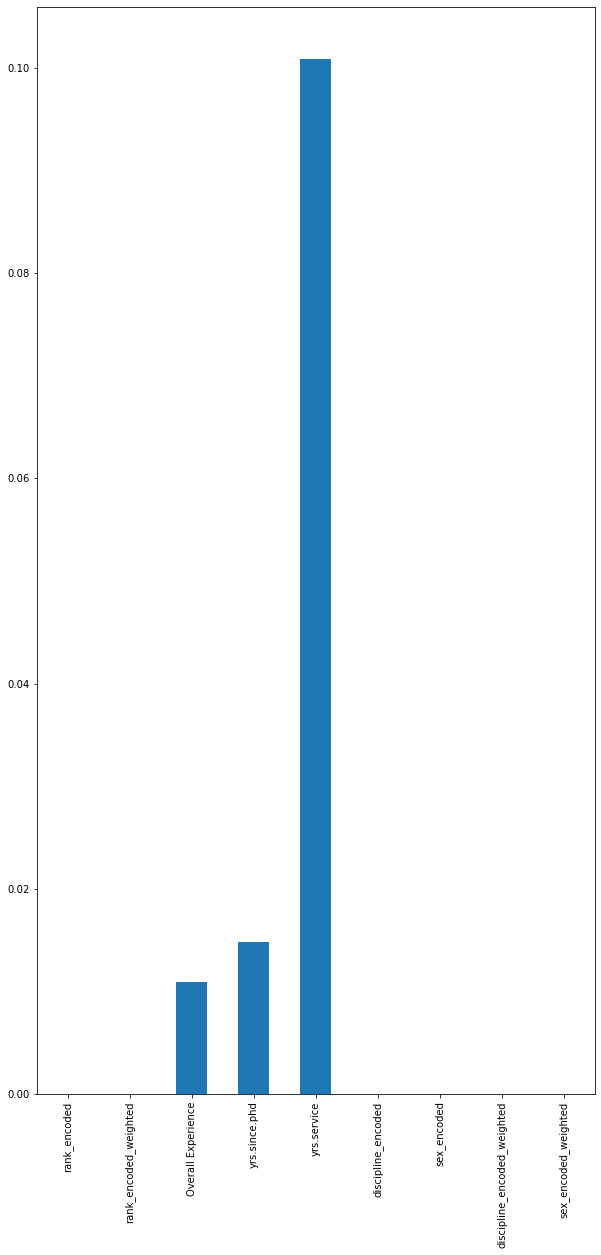

In [43]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

In [44]:
p_values=p_values[p_values<0.1]
p_values.index

Index(['rank_encoded', 'rank_encoded_weighted', 'Overall Experience',
       'yrs.since.phd'],
      dtype='object')

In [45]:
import numpy as np
x=x[['rank_encoded', 'rank_encoded_weighted', 'yrs.since.phd','Overall Experience']]
x.sample()

,rank_encoded,rank_encoded_weighted,yrs.since.phd,Overall Experience
126,90000.0,90000.0,34144.184,38599.902599


In [46]:
y.sample()

327    151650
Name: salary, dtype: int64

In [47]:
x.shape, y.shape

((155, 4), (155,))

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [49]:
x_train.shape, y_train.shape

((139, 4), (139,))

# Model 1

In [50]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
rfc=el(200, criterion='squared_error', random_state=100, max_features='sqrt', min_weight_fraction_leaf=0.1, min_impurity_decrease=0.01, n_jobs=-1, warm_start=True, max_depth=30, max_leaf_nodes=10, ccp_alpha=1, oob_score=True, bootstrap=True)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
#scores=cross_val_score(rfc, x, y, cv=5)
#cv_scores=scores.mean()
#print(scores.std())
#print(cv_scores)

0.49689247925594104
0.39995930796339474


# Model By Applying Grid Search CV

In [51]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [52]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostRegressor(base_estimator=rfc, learning_rate=1.0,loss='linear', n_estimators=50, random_state=None), n_jobs=1, param_grid={'n_estimators': [50, 100],'learning_rate': [0.01, 0.05, 0.1, 0.5],'loss': ['linear', 'square', 'exponential']},pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(ccp_alpha=1,
                                                                              max_depth=30,
                                                                              max_features='sqrt',
                                                                              max_leaf_nodes=10,
                                                                              min_impurity_decrease=0.01,
                                                                              min_weight_fraction_leaf=0.1,
                                                                              n_estimators=200,
                                                                              n_jobs=-1,
                                                                              oob_score=True,
                                                                              random_sta

In [53]:
print(gridsearch.best_params_)
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}
print(gridsearch.best_score_)

{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 100}
0.3888141868866833


In [54]:
best_estim=gridsearch.best_estimator_
print(best_estim)

AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=100)


In [55]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.5159414516867494
Test score:  0.44562840662027703


# Model 3 With Grid Search CV

In [56]:
import sklearn.ensemble
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
abreg = sklearn.ensemble.BaggingRegressor()
params = {
 'n_estimators': [50, 100],
 'max_samples' : [0.01, 0.05, 0.1, 0.5],
 'bootstrap' : [True, False],
 'oob_score' : [True, False],
 'warm_start' : [True, False],
 'n_jobs'  : [1,-1],
 'random_state' : [0,10,100,1000,10000,100000,100000]  
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [57]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
#GridSearchCV(cv=5, error_score='raiase', estimator=abreg(base_estimator=rfc), n_jobs=1, param_grid={'n_estimators': [50, 100],'max_sample':[0.01, 0.05, 0.1, 0.5], 'bootstrap':[True, False], 'oob_score':[True,False], 'warm_start':[True, False], 'n_jobs':[1,-1], },pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_samples': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100], 'n_jobs': [1, -1],
                         'oob_score': [True, False],
                         'random_state': [0, 10, 100, 1000, 10000, 100000,
                                          100000],
                         'warm_start': [True, False]},
             return_train_score=True)

In [58]:
print(gridsearch.best_params_)
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}
print(gridsearch.best_score_)

{'bootstrap': False, 'max_samples': 0.1, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 10, 'warm_start': True}
0.382161778825255


In [59]:
best_estim=gridsearch.best_estimator_
print(best_estim)

BaggingRegressor(bootstrap=False, max_samples=0.1, n_estimators=100, n_jobs=1,
                 random_state=10, warm_start=True)


In [60]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.490529361089858
Test score:  0.37174272148058973


# Model 4: Extra Trees

In [61]:
abreg = sklearn.ensemble.ExtraTreesRegressor()
params = {
 'n_estimators': [50, 100],
 'max_samples' : [0.01, 0.05, 0.1, 0.5],
 'bootstrap' : [True, False],
 'oob_score' : [True, False],
 'warm_start' : [True, False],
 'n_jobs'  : [1,-1],
 'random_state' : [0,10,100,1000,10000,100000,100000],
 'criterion' : ['squared_error', 'absolute_error'] 
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [62]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(x_train, y_train)
#GridSearchCV(cv=5, error_score='raiase', estimator=abreg(base_estimator=rfc), n_jobs=1, param_grid={'n_estimators': [50, 100],'max_sample':[0.01, 0.05, 0.1, 0.5], 'bootstrap':[True, False], 'oob_score':[True,False], 'warm_start':[True, False], 'n_jobs':[1,-1], },pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_samples': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100], 'n_jobs': [1, -1],
                         'oob_score': [True, False],
                         'random_state': [0, 10, 100, 1000, 10000, 100000,
                                          100000],
                         'warm_start': [True, False]},
             return_train_score=True)

In [63]:
print(gridsearch.best_params_)
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'absolute_error', 'max_samples': 0.1, 'n_estimators': 50, 'n_jobs': 1, 'oob_score': True, 'random_state': 1000, 'warm_start': True}
0.386985842319658


In [64]:
best_estim=gridsearch.best_estimator_
print(best_estim)

ExtraTreesRegressor(bootstrap=True, criterion='absolute_error', max_samples=0.1,
                    n_estimators=50, n_jobs=1, oob_score=True,
                    random_state=1000, warm_start=True)


In [65]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.503679856397909
Test score:  0.40340130649308803


# Model 5

In [72]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True,n_jobs=-1, positive=True)
lm.fit(x_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [73]:
lm.score(x_train, y_train)

0.4081899083054571

In [74]:
lm.score(x_test, y_test)

0.5435859576997599

In [1]:
Results= 'Best Model is Linear Regression With 54.36% accuracy on test data'
print('Model Selection Decision: ', Results)    

Model Selection Decision:  Best Model is Linear Regression With 54.36% accuracy on test data
